In [142]:
#libraries/imports
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_classif
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
import seaborn as sns







In [143]:
df = pd.read_csv('Pokemon.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [145]:
display(df)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [146]:
# Calculate basic statistics for the Total column
total_mean = df['Total'].mean()
total_std = df['Total'].std()
total_min = df['Total'].min()
total_max = df['Total'].max()

# Print the results
print(f"Mean Total base stats: {total_mean:.2f}")
print(f"Standard deviation of Total: {total_std:.2f}")
print(f"Minimum Total: {total_min}")
print(f"Maximum Total: {total_max}")


Mean Total base stats: 435.10
Standard deviation of Total: 119.96
Minimum Total: 180
Maximum Total: 780


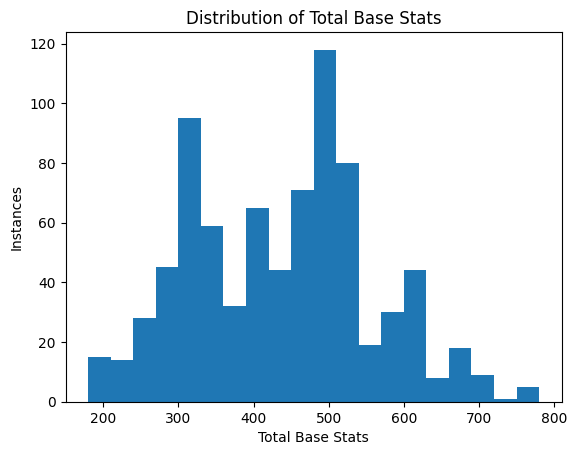

In [147]:
import matplotlib.pyplot as plt

# Plot histogram of Total column
plt.hist(df['Total'], bins=20)

# Add labels
plt.title('Distribution of Total Base Stats')
plt.xlabel('Total Base Stats')
plt.ylabel('Instances')

plt.show()


In [148]:
import statsmodels.formula.api as smf

result = smf.ols('Total ~ C("Type 1")', data=df).fit()
print(result.summary())

PatsyError: Number of rows mismatch between data argument and C("Type 1") (800 versus 1)
    Total ~ C("Type 1")
            ^^^^^^^^^^^

In [ ]:
# Group the data by Type 1 and calculate the mean Total value for each group
means = df.groupby('Type 1')['Total'].mean()

# Create a bar plot
plt.bar(means.index, means.values)
plt.xlabel('Type 1')
plt.ylabel('Average Total')

plt.xticks(rotation=90)

plt.show()

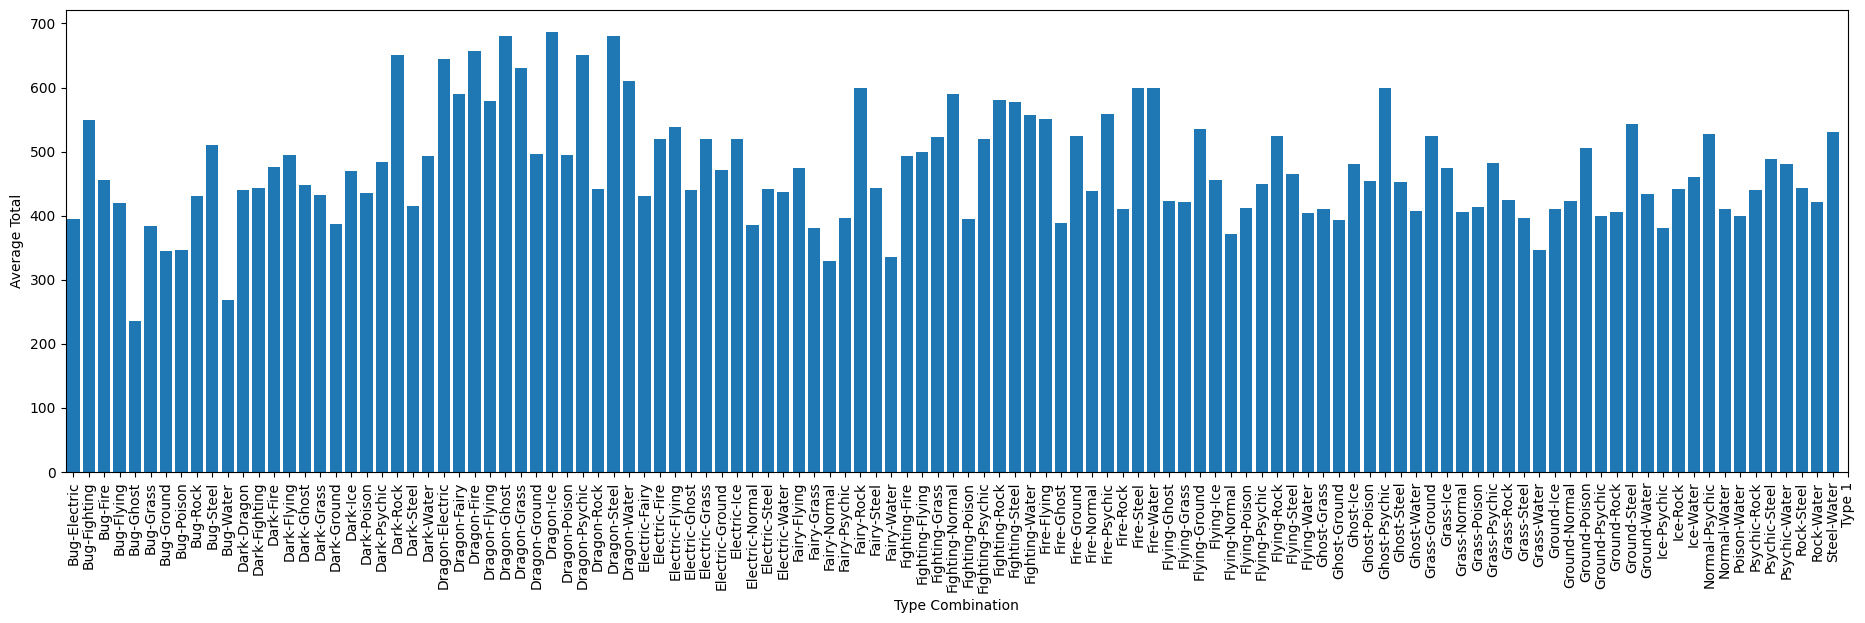

In [93]:
# Add a new column with the dual types sorted alphabetically
df['Type Combo'] = df.apply(lambda row: '-'.join(sorted([str(row['Type 1']), str(row['Type 2'])])), axis=1)

# Filter the data to only include rows where Type 2 is not null
dual_type_df = df[df['Type 2'].notnull()]

# Filter the data to only include rows with dual types
dual_type_df = dual_type_df[dual_type_df['Type Combo'].str.contains('-')]

# Group the data by Type Combo and calculate the mean Total value for each group
means = dual_type_df.groupby('Type Combo')['Total'].mean()

# Create a bar plot
plt.figure(figsize=(23, 6))  # Set the size of the plot
plt.bar(means.index, means.values)
plt.xlabel('Type Combination')
plt.ylabel('Average Total')

plt.xticks(rotation=90)
plt.xlim(-0.5, max(data))

plt.show()


In [94]:
# Create a contingency table of the Pokemon types
types_count = df['Type 1'].value_counts()
observed_frequencies = types_count.values
total_observed = sum(observed_frequencies)
expected_frequencies = np.repeat(total_observed / len(types_count), len(types_count))

# Perform the chi-square goodness of fit test
chi2, p = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print the results
print("Chi-square statistic: ", chi2)
print("P-value: ", p)

Chi-square statistic:  297.7750000000001
P-value:  3.2397367190930687e-53


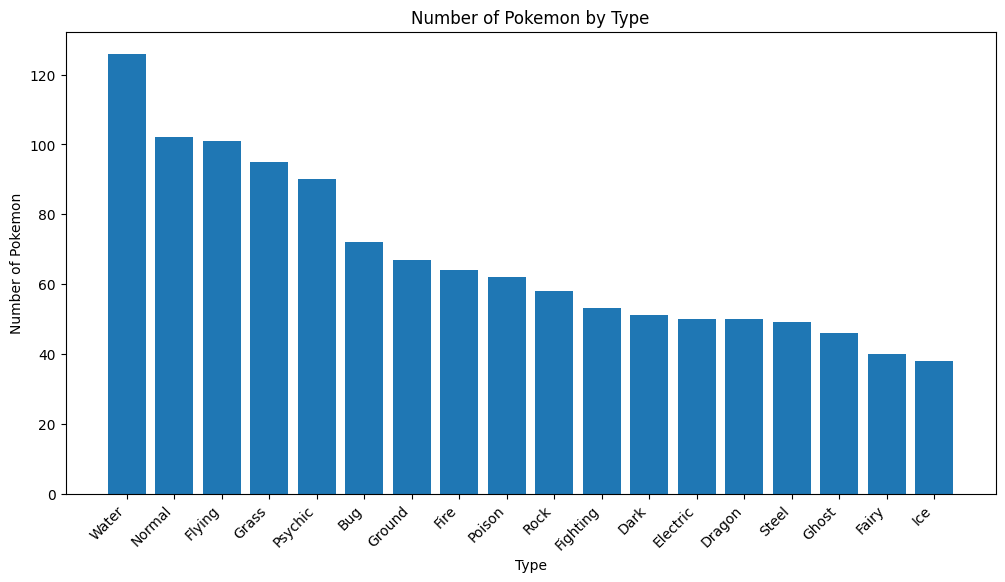

In [95]:
# Combine Type 1 and Type 2 columns and count the number of Pokemon for each type
types = pd.concat([df['Type 1'], df['Type 2']])
type_counts = types.value_counts().sort_values(ascending=False)

# Create a bar plot of the type frequencies
plt.figure(figsize=(12,6))
plt.bar(type_counts.index, type_counts.values)
plt.title('Number of Pokemon by Type')
plt.xlabel('Type')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=45, ha='right')
plt.show()

In [96]:
# Perform a one-way ANOVA test on the total score by type
f_stat, p_val = f_oneway(df['Total'][df['Type 1'] == 'Bug'],
                         df['Total'][df['Type 1'] == 'Dark'],
                         df['Total'][df['Type 1'] == 'Dragon'],
                         df['Total'][df['Type 1'] == 'Electric'],
                         df['Total'][df['Type 1'] == 'Fairy'],
                         df['Total'][df['Type 1'] == 'Fighting'],
                         df['Total'][df['Type 1'] == 'Fire'],
                         df['Total'][df['Type 1'] == 'Flying'],
                         df['Total'][df['Type 1'] == 'Ghost'],
                         df['Total'][df['Type 1'] == 'Grass'],
                         df['Total'][df['Type 1'] == 'Ground'],
                         df['Total'][df['Type 1'] == 'Ice'],
                         df['Total'][df['Type 1'] == 'Normal'],
                         df['Total'][df['Type 1'] == 'Poison'],
                         df['Total'][df['Type 1'] == 'Psychic'],
                         df['Total'][df['Type 1'] == 'Rock'],
                         df['Total'][df['Type 1'] == 'Steel'],
                         df['Total'][df['Type 1'] == 'Water'])

# Print the ANOVA results
print('One-way ANOVA:')
print('F-value:', f_stat)
print('p-value:', p_val)

# Perform post-hoc tests using Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['Total'], df['Type 1'], 0.05)

# Print the post-hoc results
print('\nPost-hoc results (Tukey HSD):')
#print(tukey_results)

One-way ANOVA:
F-value: 4.638767481660551
p-value: 2.077215448842098e-09

Post-hoc results (Tukey HSD):


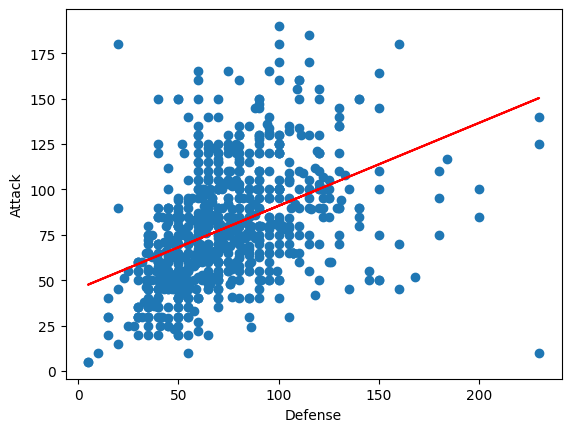

In [97]:
# Select the relevant columns from the dataset
X = df[['Defense']]
y = df['Attack']

# Create a Linear Regression model and fit it to the data
reg = LinearRegression().fit(X, y)

# Get the coefficients of the linear model
coef = reg.coef_
intercept = reg.intercept_

# Plot the linear regression line
plt.scatter(X, y)
plt.plot(X, coef*X + intercept, color='red')
plt.xlabel('Defense')
plt.ylabel('Attack')
plt.show()

In [98]:
import statsmodels.api as sm

# Create a new column for generation as a categorical variable
df['Generation_cat'] = pd.Categorical(df['Generation'])

# Fit a linear regression model
model = sm.formula.ols('Total ~ Generation_cat', data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.547
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.173
Time:                        13:49:30   Log-Likelihood:                -4960.5
No. Observations:                 800   AIC:                             9933.
Df Residuals:                     794   BIC:                             9961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             426.8133    

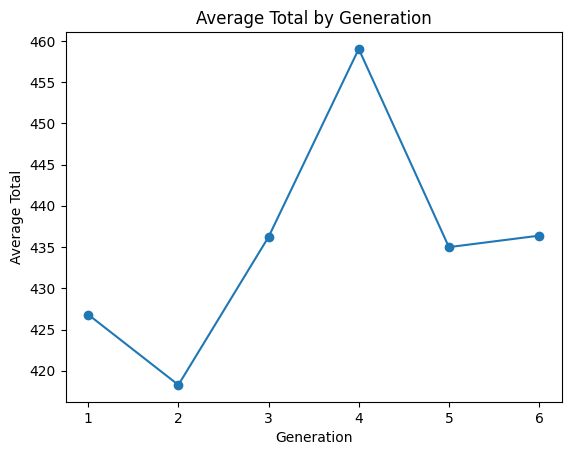

In [99]:
# Convert the 'Generation' column to an ordered categorical type
df['Generation'] = pd.Categorical(df['Generation'], ordered=True)

# Group the data by generation and calculate the mean Total value for each group
means = df.groupby('Generation')['Total'].mean()

# Create a line plot
plt.plot(means.index, means.values, marker='o')

plt.xlabel('Generation')
plt.ylabel('Average Total')
plt.title('Average Total by Generation')

plt.show()
